In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler, LabelEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline  
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve


In [2]:
df = pd.read_csv(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI_Collection_and_Loss_Reverse_Forecast\data\AI_Collection_and_Loss_Reverse_Forecast.csv",  on_bad_lines='skip', delimiter=";")
df.head()

,debtor_name,debtor_nik,debtor_address,debtor_zip,debtor_rt,debtor_rw,debtor_birth_place,debtor_age,debtor_number,debtor_occupation,...,arrears6,arrears7,arrears8,arrears9,arrears10,arrears11,arrears12,aging,credit_risk,loss_reverse
0,Cemplunk Zulaika,"4,13343E+15","Jalan Raya Setiabudhi No. 857\nBanjarbaru, KR ...",12188,6,10,"Bengkulu, 23-09-1997",26,+62 (102) 776 3467,Pengusaha,...,0,0,0,0,0,0,0,DPK,Tertagih dengan resiko rendah,0
1,"Clara Padmasari, M.Pd","7,87362E+15","Jalan Cihampelas No. 4\nPekanbaru, Sulawesi Se...",56126,20,20,"Jawa Tengah, 13-04-1964",59,+62 (808) 299 5117,Pengusaha,...,0,0,0,0,0,1,0,DPK,Tertagih dengan resiko rendah,17708333
2,"Puti Cinthia Oktaviani, S.IP","9,93737E+15","Jl. Wonoayu No. 68\nSemarang, Riau 98101",98101,2,15,"Jawa Tengah, 01-09-1981",42,+62 (0582) 416 0892,Buruh,...,0,0,0,0,0,0,0,Lancar,Tertagih dengan resiko rendah,0
3,"Lalita Astuti, M.TI.","2,07108E+15","Gg. Sentot Alibasa No. 781\nPontianak, SU 76993",76993,19,16,"Aceh, 14-02-1987",36,+62 (737) 295-9765,Pengusaha,...,0,0,1,0,0,0,0,DPK,Tertagih dengan resiko rendah,15291667
4,Daliman Kusumo,"8,85274E+15","Jl. Ronggowarsito No. 0\nTanjungpinang, NB 06297",6297,1,1,"Gorontalo, 06-12-1998",25,+62 (0740) 390 0826,Pegawai Swasta,...,0,0,0,0,0,0,0,DPK,Tertagih dengan resiko rendah,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   debtor_name             5000 non-null   object
 1   debtor_nik              5000 non-null   object
 2   debtor_address          5000 non-null   object
 3   debtor_zip              5000 non-null   int64 
 4   debtor_rt               5000 non-null   int64 
 5   debtor_rw               5000 non-null   int64 
 6   debtor_birth_place      5000 non-null   object
 7   debtor_age              5000 non-null   int64 
 8   debtor_number           5000 non-null   object
 9   debtor_occupation       5000 non-null   object
 10  debtor_marital_status   5000 non-null   object
 11  debtor_company          5000 non-null   object
 12  debtor_gender           5000 non-null   object
 13  debtor_education_level  5000 non-null   object
 14  employment_type         5000 non-null   object
 15  numb

In [4]:
X = df.drop("credit_risk", axis=1)
y = df["credit_risk"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)


In [5]:
model = joblib.load("credit_risk.joblib")
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['net_income', 'loan_amount',
                                                   'amount_of_late',
                                                   'late_payment_amount',
                                                   'credit_score',
                                                   'arrears_amounts',
                                                   'loss_reverse']),
                                                 ('drop', 'drop',
                                                  ['debtor_name', 'debtor_nik',
                                                   'debtor_address',
                                                   'debtor_numbe...
                                                   'employment_type',
                                                   'payment_date',
                                                   'number_of_dependents',
                                                   'aset', 'bil1_late1',
                                                   'bill_late2', 'bill_late3',
                                                   'bill_late4', 'bill_late5',
                                                   'bill_late6', 'bill_late7',
                                                   'bill_late8', 'bill_late9',
                                                   'bill_late10', 'bill_late11',
                                                   'bill_late12', 'arrears1',
                                                   'arrears2', 'arrears3',
                                                   'arrears4', 'arrears5',
                                                   'arrears6', 'arrears7',
                                                   'arrears8', ...])])),
                ('regressor', BaggingClassifier())])

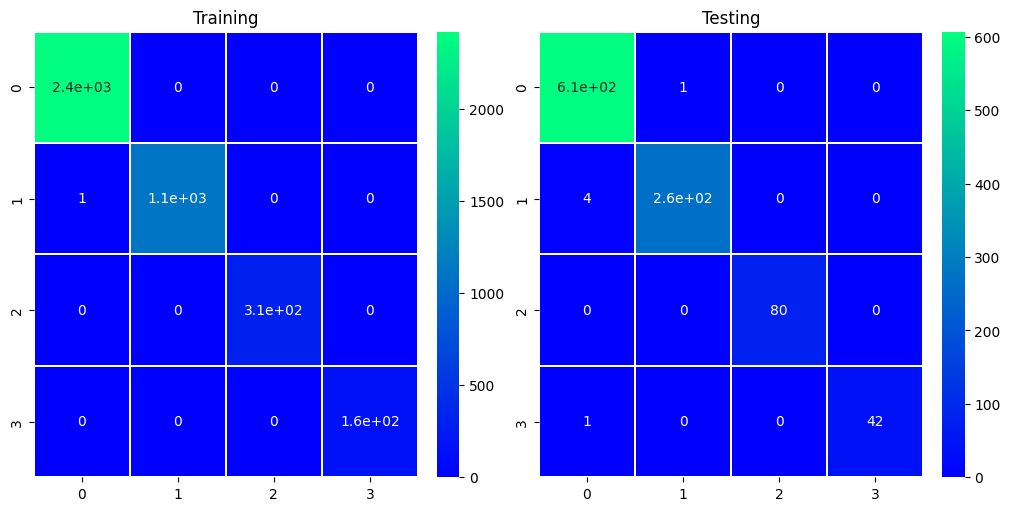

In [6]:
y_pred = model.predict(X_test)
fig, ax = plt.subplots(1, 2, figsize=(10, 5), layout="constrained")
sns.heatmap(confusion_matrix(y_train, model.predict(X_train)), annot=True, linecolor="white", linewidths=0.2, cmap="winter", ax=ax[0])
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, linecolor="white", linewidths=0.2, cmap="winter", ax=ax[1])

ax[0].set_title("Training")
ax[1].set_title("Testing")
plt.show()

In [7]:
print(classification_report(y_test, y_pred))

                                     precision    recall  f1-score   support

      Tertagih dengan resiko rendah       0.99      1.00      1.00       608
      Tertagih dengan resiko tinggi       1.00      0.99      0.99       269
Tidak tertagih dengan resiko rendah       1.00      1.00      1.00        80
Tidak tertagih dengan resiko tinggi       1.00      0.98      0.99        43

                           accuracy                           0.99      1000
                          macro avg       1.00      0.99      0.99      1000
                       weighted avg       0.99      0.99      0.99      1000



In [8]:
# joblib.dump(model, "credit_risk.joblib")

In [14]:
result = model.predict(X_test)[-1]
result

'Tertagih dengan resiko rendah'

In [15]:
y_test.iloc[-1]

'Tertagih dengan resiko rendah'